In [1]:
import numpy as np
import nltk
from nltk.corpus import*
import pandas as pd

In [2]:
Data_root = Data_root = ['P_C_0', 'P_C_1', 'P_C_2', 'P_C_3', 'P_C_4', 'P_C_5', 'P_C_6', 'P_C_7', 'P_C_8', 'P_C_9', 'P_C_10', 'P_C_11', 'P_C_12', 'P_C_13', 'P_C_14', 'P_C_15', 'P_C_16', 'P_C_17', 'P_C_18', 'P_C_19', 'P_C_20', 'C_C_0', 'C_C_1', 'C_C_2', 'C_C_3', 'C_C_4', 'C_C_5', 'C_C_6', 'C_C_7', 'C_C_8', 'C_C_9', 'C_C_10', 'C_C_11', 'C_C_12', 'C_C_13', 'C_C_14', 'C_C_15', 'C_C_16', 'C_C_17', 'C_C_18', 'C_C_19', 'C_C_20', 'J_C_0', 'J_C_1', 'J_C_2', 'J_C_3', 'J_C_4', 'J_C_5', 'J_C_6', 'J_C_7', 'J_C_8', 'J_C_9', 'J_C_10', 'J_C_11', 'J_C_12', 'J_C_13', 'J_C_14', 'J_C_15', 'J_C_16', 'J_C_17', 'J_C_18', 'J_C_19', 'J_C_20', 'Prolog_C_0', 'Prolog_C_1', 'Prolog_C_2', 'Prolog_C_3', 'Prolog_C_4', 'Prolog_C_5', 'Prolog_C_6', 'Prolog_C_7', 'Prolog_C_8', 'Prolog_C_9', 'Prolog_C_10', 'Prolog_C_11', 'Prolog_C_12', 'Prolog_C_13', 'Prolog_C_14', 'Prolog_C_15', 'Prolog_C_16', 'Prolog_C_17', 'Prolog_C_18', 'Prolog_C_19', 'Prolog_C_20']

corpus = []
for i in range(84):
    corpus.append(PlaintextCorpusReader('C://Users/cse_223/Python_C_Java_Prolog_data_Clustering_84 group files list_Corpus/'+Data_root[i],'.*\.txt',encoding ="utf-8"))

In [3]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [4]:
data = []
for i in range(84):
    data.append(corpus[i].raw())

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cse_223\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags = [str(i)]) 
              for i, _d in enumerate(data)]

In [7]:
model = gensim.models.doc2vec.Doc2Vec(vector_size = 30, min_count = 2, epochs = 80)

In [8]:
model.build_vocab(tagged_data)

In [9]:
model.train(tagged_data, total_examples=model.corpus_count, epochs=80)

In [10]:
model.save("Doc2vec.model")

In [11]:
model = Doc2Vec.load("Doc2vec.model")

# Python Clustering 0 group target

In [12]:
similar_doc = model.docvecs.most_similar('0')
print(similar_doc[0])

('2', 0.8705704212188721)


In [13]:
similar_doc

[('2', 0.8705704212188721),
 ('10', 0.8635190725326538),
 ('5', 0.84604811668396),
 ('11', 0.8194308280944824),
 ('7', 0.8068335056304932),
 ('4', 0.7864444255828857),
 ('6', 0.7718713879585266),
 ('50', 0.7693320512771606),
 ('3', 0.7645399570465088),
 ('8', 0.7521374225616455)]

In [14]:
model['0']

array([ 0.37621436,  3.5731325 ,  2.2868276 , -0.87928367,  1.1130763 ,
       -4.332567  , -0.40138185, -0.66567576, -2.916416  , -0.9187778 ,
        0.06098913,  1.7445747 ,  2.5900326 , -1.0432558 , -1.4326829 ,
       -1.454238  , -5.038094  , -4.3730707 ,  1.1889484 ,  0.6522841 ,
        2.049648  , -1.150123  , -1.8202511 , -0.5527356 , -0.19716883,
       -0.9598634 ,  1.0045874 , -1.474645  ,  1.3862326 , -1.3618836 ],
      dtype=float32)

In [15]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

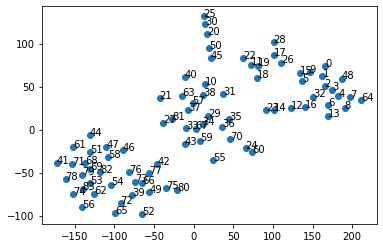

In [16]:
display_closestwords_tsnescatterplot(model, '0')

In [17]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [18]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   200.047760  174.552246
1   206.903168  154.091797
2   222.833405  142.428238
3   233.305847  127.785225
4   249.518036  117.380058
..         ...         ...
79 -150.871704 -172.639526
80  -87.075005   25.525356
81   25.894808  -37.909748
82 -113.057823 -238.609985
83 -168.234100 -198.590683

[84 rows x 2 columns]


In [19]:
df.to_csv('doc2vec0.csv')

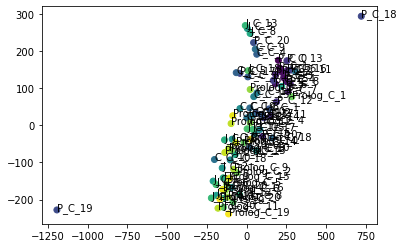

In [20]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [21]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [22]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

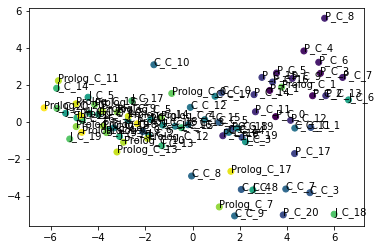

In [23]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

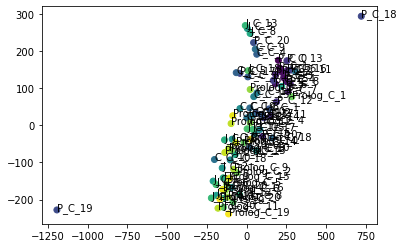

In [24]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 1 group target

In [25]:
similar_doc = model.docvecs.most_similar('1')
print(similar_doc[0])

('4', 0.9213533401489258)


In [26]:
similar_doc

[('4', 0.9213533401489258),
 ('3', 0.9060583114624023),
 ('2', 0.9021668434143066),
 ('6', 0.8504455089569092),
 ('5', 0.8273470401763916),
 ('7', 0.812635064125061),
 ('12', 0.8006681203842163),
 ('8', 0.8001532554626465),
 ('11', 0.7914391756057739),
 ('10', 0.7876849174499512)]

In [27]:
model['1']

array([ 0.96674615,  4.281096  ,  2.5892656 , -0.29474482,  2.204537  ,
       -3.8771389 , -1.6380018 ,  0.6045401 , -2.3931632 , -0.96012026,
        1.514203  ,  1.3966144 ,  3.0479088 , -1.7060875 , -1.0059775 ,
        0.11453485, -2.618407  , -3.5276182 ,  0.26291844, -1.0712904 ,
        0.73489493, -0.84306216, -1.5935067 , -0.76369387, -0.31257138,
       -0.17384568,  0.20975958, -0.58754283,  1.7802478 , -1.4149375 ],
      dtype=float32)

In [28]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

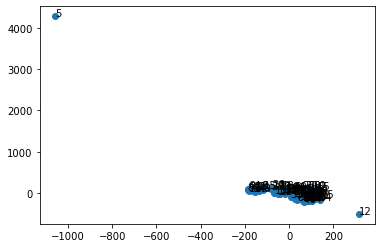

In [29]:
display_closestwords_tsnescatterplot(model, '1')

In [30]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [31]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0    89.147575  212.718735
1    73.979744  201.120926
2    57.077183  204.674820
3    44.103512  193.302429
4    32.380299  204.587967
..         ...         ...
79 -177.703491  -36.476780
80  180.669617  141.234833
81   16.505394  -56.946842
82 -195.277328  -11.782814
83 -202.121521  -66.530739

[84 rows x 2 columns]


In [32]:
df.to_csv('doc2vec1.csv')

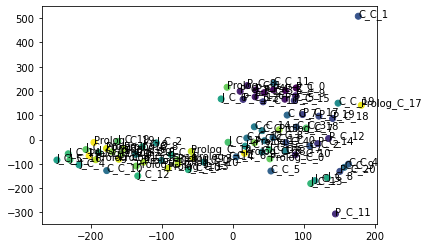

In [33]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [34]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [35]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

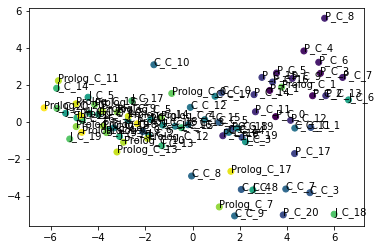

In [36]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

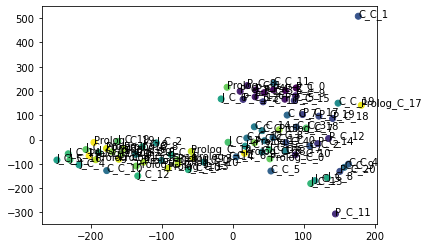

In [37]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 2 group target

In [38]:
similar_doc = model.docvecs.most_similar('2')
print(similar_doc[0])

('4', 0.9387005567550659)


In [39]:
similar_doc

[('4', 0.9387005567550659),
 ('1', 0.9021669626235962),
 ('3', 0.8998386859893799),
 ('11', 0.8996524214744568),
 ('5', 0.8992819786071777),
 ('10', 0.8942812085151672),
 ('6', 0.8850348591804504),
 ('7', 0.8764194250106812),
 ('0', 0.8705704212188721),
 ('12', 0.8640357255935669)]

In [40]:
model['2']

array([ 0.9933168 ,  4.466707  ,  3.7006168 ,  0.5272483 ,  1.5490127 ,
       -4.7415605 , -1.8063161 ,  0.9810357 , -3.311245  , -0.46313447,
        1.2244872 ,  1.7150419 ,  4.977457  , -2.6482153 , -1.3760705 ,
        0.5594877 , -1.9067098 , -3.253641  ,  0.18265939, -1.7606249 ,
        0.8005383 ,  1.3905457 , -1.6089387 , -0.71851903, -0.69767123,
       -0.86542636,  1.2192359 , -0.05410406,  1.1218829 , -2.109108  ],
      dtype=float32)

In [41]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

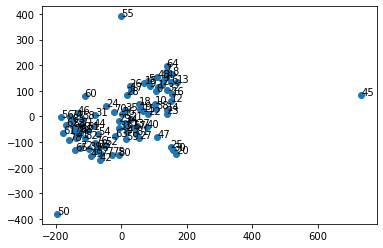

In [42]:
display_closestwords_tsnescatterplot(model, '2')

In [43]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [44]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0    -7.062961 -170.935150
1    -2.870912 -190.091415
2    -7.796238 -207.739426
3    -8.424909 -224.347397
4   -16.982071 -239.479568
..         ...         ...
79   -3.678859  199.692108
80 -108.273209   49.712170
81   15.199607   34.035717
82  -38.530773  204.764664
83   41.402084  216.154739

[84 rows x 2 columns]


In [45]:
df.to_csv('doc2vec2.csv')

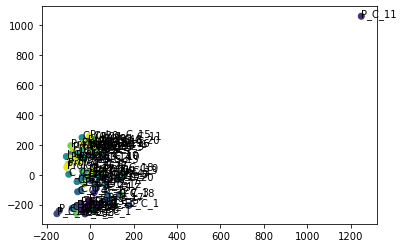

In [46]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [47]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [48]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

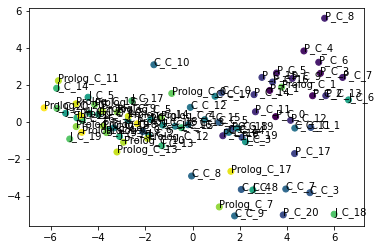

In [49]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

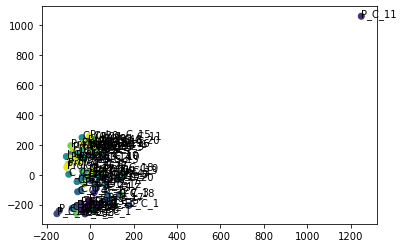

In [50]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 3 group target

In [51]:
similar_doc = model.docvecs.most_similar('3')
print(similar_doc[0])

('4', 0.9569242000579834)


In [52]:
similar_doc

[('4', 0.9569242000579834),
 ('5', 0.907560408115387),
 ('1', 0.9060583114624023),
 ('2', 0.8998386859893799),
 ('10', 0.8972153067588806),
 ('11', 0.8944577574729919),
 ('7', 0.8542734384536743),
 ('6', 0.8520346879959106),
 ('13', 0.7995131015777588),
 ('8', 0.7978066205978394)]

In [53]:
model['3']

array([ 1.585265  ,  5.3351774 ,  4.2061152 , -0.05653854,  2.9553614 ,
       -4.4327483 , -0.55971205,  0.46744227, -2.924388  , -1.3446125 ,
        1.8037797 ,  2.569531  ,  5.03588   , -2.386789  , -1.4014132 ,
        0.21183227, -1.8093137 , -2.207899  , -0.39313477, -1.0738754 ,
        0.61264664,  0.26468217, -1.3964492 , -0.8887673 , -0.05779801,
       -0.6134273 ,  1.2432079 ,  0.8474855 ,  2.1486185 , -2.6969085 ],
      dtype=float32)

In [54]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

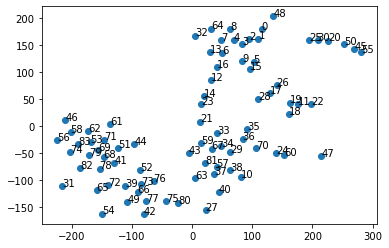

In [55]:
display_closestwords_tsnescatterplot(model, '3')

In [56]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [57]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0    55.492313 -192.423691
1    44.086769 -180.678055
2    30.373846 -183.164322
3    14.855589 -185.295685
4    17.881439 -198.192368
..         ...         ...
79   20.899351  165.555695
80 -102.586243 -117.122604
81  -28.776659   36.526703
82   -1.274428  165.275955
83   25.512781  190.888931

[84 rows x 2 columns]


In [58]:
df.to_csv('doc2vec3.csv')

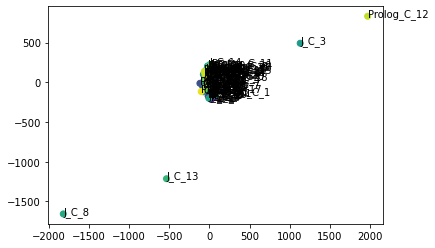

In [59]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [60]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [61]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

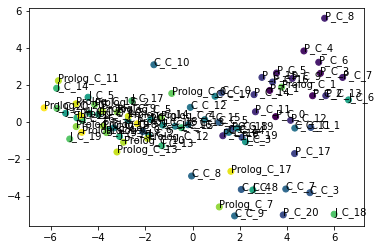

In [62]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

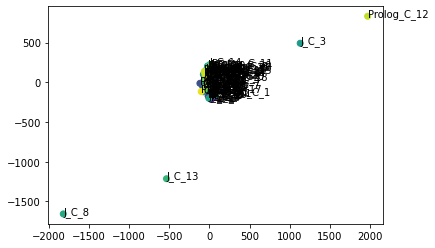

In [63]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 4 group target

In [64]:
similar_doc = model.docvecs.most_similar('4')
print(similar_doc[0])

('3', 0.9569242000579834)


In [65]:
similar_doc

[('3', 0.9569242000579834),
 ('2', 0.9387005567550659),
 ('1', 0.9213534593582153),
 ('5', 0.9006364941596985),
 ('11', 0.8918036222457886),
 ('6', 0.8728190660476685),
 ('10', 0.8676400184631348),
 ('7', 0.8566982746124268),
 ('8', 0.8306384086608887),
 ('12', 0.8277997970581055)]

In [66]:
model['4']

array([ 0.12308008,  4.7238255 ,  4.0517817 , -0.9928403 ,  2.0816934 ,
       -3.8160436 , -0.93930066,  0.82012403, -2.104096  , -0.44820544,
        2.6741407 ,  1.3611361 ,  5.4751215 , -1.7622167 , -2.7982152 ,
        0.28472328, -2.1020272 , -1.5697281 , -0.01408787,  0.3944149 ,
        1.1475295 ,  0.53669786, -1.2169673 , -1.8662267 , -0.45138136,
       -0.22713561,  1.2500029 ,  0.6205703 ,  2.1223428 , -3.3914337 ],
      dtype=float32)

In [67]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

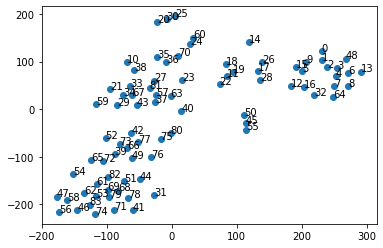

In [68]:
display_closestwords_tsnescatterplot(model, '4')

In [69]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [70]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0  -218.244873 -259.422729
1  -209.370285 -237.181763
2  -205.688110 -217.167847
3  -206.071304 -196.252243
4  -213.872360 -178.187149
..         ...         ...
79  274.461182   59.145576
80   66.288139   14.029860
81  -24.998295   89.486008
82  312.752319    9.435482
83  304.978302   78.275642

[84 rows x 2 columns]


In [71]:
df.to_csv('doc2vec4.csv')

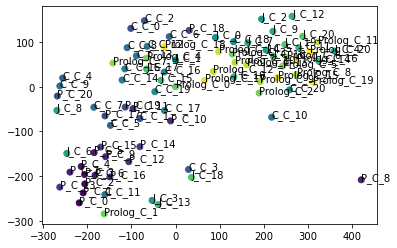

In [72]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [73]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [74]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

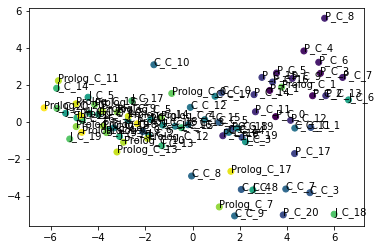

In [75]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

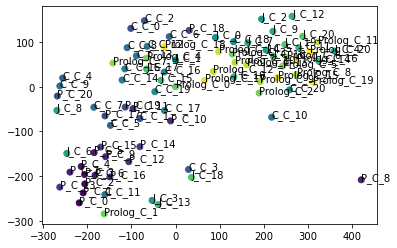

In [76]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 5 group target

In [77]:
similar_doc = model.docvecs.most_similar('5')
print(similar_doc[0])

('10', 0.9361553192138672)


In [78]:
similar_doc

[('10', 0.9361553192138672),
 ('3', 0.907560408115387),
 ('4', 0.9006364941596985),
 ('2', 0.8992819786071777),
 ('6', 0.8710088729858398),
 ('7', 0.8691965937614441),
 ('11', 0.8681982159614563),
 ('0', 0.84604811668396),
 ('1', 0.8273470997810364),
 ('14', 0.786695122718811)]

In [79]:
model['5']

array([ 0.8353105 ,  3.5107892 ,  2.9047146 , -0.36379915,  1.5777112 ,
       -4.286337  ,  0.6351956 , -0.20415877, -2.3580425 , -2.4965246 ,
        2.1804185 ,  2.024799  ,  4.453579  , -1.1791087 , -3.8586183 ,
       -0.8103969 , -1.9726301 , -1.5926385 , -0.10322256, -0.81701714,
        1.305584  , -0.0871321 , -1.1747715 , -0.48246557,  0.42571545,
       -0.6298295 , -0.48706308,  0.1444844 ,  2.5613706 , -1.5709792 ],
      dtype=float32)

In [80]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

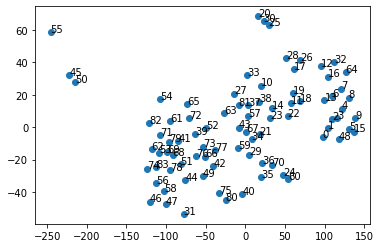

In [81]:
display_closestwords_tsnescatterplot(model, '5')

In [82]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [83]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   -40.847317  110.201111
1   -55.537407  111.457352
2   -67.790703  114.478973
3   -77.835136  104.814827
4   -89.907318  111.752373
..         ...         ...
79  133.695251    5.446239
80   43.741486 -101.008469
81   17.592279  -37.663212
82  162.241333  -56.275707
83  165.417953  -10.800456

[84 rows x 2 columns]


In [84]:
df.to_csv('doc2vec5.csv')

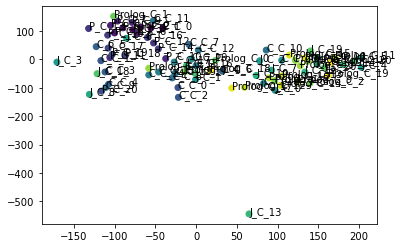

In [85]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [86]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [87]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

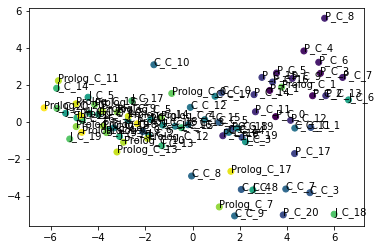

In [88]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

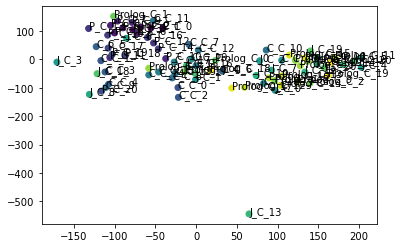

In [89]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 6 group target

In [90]:
similar_doc = model.docvecs.most_similar('6')
print(similar_doc[0])

('8', 0.9443484544754028)


In [91]:
similar_doc

[('8', 0.9443484544754028),
 ('7', 0.906230092048645),
 ('12', 0.9051864147186279),
 ('11', 0.8980104923248291),
 ('13', 0.8932897448539734),
 ('2', 0.8850349187850952),
 ('4', 0.8728191256523132),
 ('5', 0.8710088729858398),
 ('10', 0.8670467734336853),
 ('3', 0.8520347476005554)]

In [92]:
model['6']

array([ 0.90180707,  4.7477612 ,  3.3702912 , -0.9585134 ,  3.9253523 ,
       -4.3022766 , -1.9370565 , -0.8091891 , -3.0465941 , -0.41826543,
        0.53162867,  1.9170132 ,  4.4874964 , -1.7676495 , -2.6447272 ,
        0.42109734, -2.5684214 , -1.5266483 , -0.00424884, -0.8056127 ,
        1.5809097 , -0.34453315, -1.7909975 , -0.5285834 ,  1.9240315 ,
       -2.3935344 ,  0.51008946,  0.02486349,  2.514498  , -3.45655   ],
      dtype=float32)

In [93]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

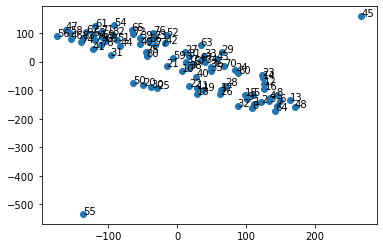

In [94]:
display_closestwords_tsnescatterplot(model, '6')

In [95]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [96]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x           y
0    3.939250 -196.122543
1   16.633518 -190.637238
2   28.809071 -193.631851
3   37.450424 -200.997635
4   48.285900 -206.651566
..        ...         ...
79  35.702164  159.405167
80  -6.561625   60.407192
81 -31.426310   22.907734
82  -7.858018  156.907623
83  48.645313  173.671997

[84 rows x 2 columns]


In [97]:
df.to_csv('doc2vec6.csv')

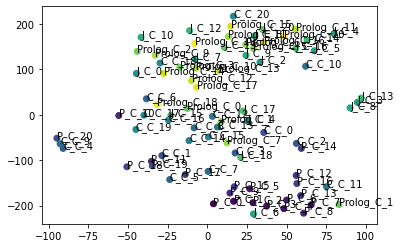

In [98]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [99]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [100]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

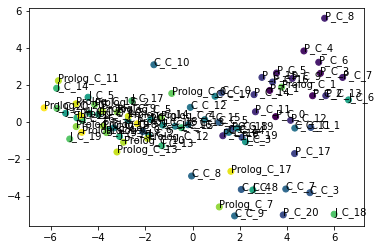

In [101]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

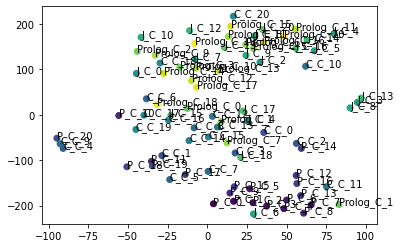

In [102]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 7 group target

In [103]:
similar_doc = model.docvecs.most_similar('7')
print(similar_doc[0])

('8', 0.9396906495094299)


In [104]:
similar_doc

[('8', 0.9396906495094299),
 ('11', 0.9179202318191528),
 ('6', 0.9062300324440002),
 ('10', 0.8832073211669922),
 ('2', 0.8764194250106812),
 ('5', 0.8691965937614441),
 ('14', 0.8654261231422424),
 ('4', 0.8566982746124268),
 ('3', 0.8542734384536743),
 ('12', 0.8487321138381958)]

In [105]:
model['7']

array([-0.02701768,  3.959721  ,  3.4904861 , -0.59478784,  3.237621  ,
       -4.670323  , -2.5200484 ,  0.70491195, -4.5117054 , -0.44008303,
        1.5030124 ,  2.6224282 ,  4.6045933 , -2.072412  , -4.116896  ,
       -2.1409304 , -2.17538   , -2.0522525 ,  0.4628693 ,  0.08540258,
        0.9177909 ,  1.2839354 , -1.4018533 , -0.55095494, -0.5610301 ,
       -1.7095431 , -0.66104805,  1.4577725 ,  1.8043303 , -3.2872846 ],
      dtype=float32)

In [106]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

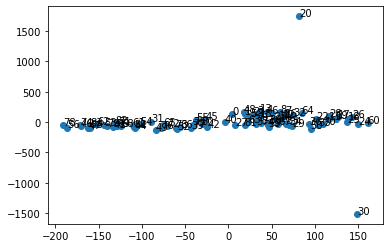

In [107]:
display_closestwords_tsnescatterplot(model, '7')

In [108]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [109]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x           y
0   68.058510  116.164276
1   70.599434  127.645065
2   67.940712  138.763168
3   56.930786  142.151703
4   58.507183  152.729630
..        ...         ...
79 -58.625416 -141.318207
80   2.696319  -52.499165
81   6.213849    8.369386
82 -44.046848 -135.373184
83 -59.955490 -159.785400

[84 rows x 2 columns]


In [110]:
df.to_csv('doc2vec7.csv')

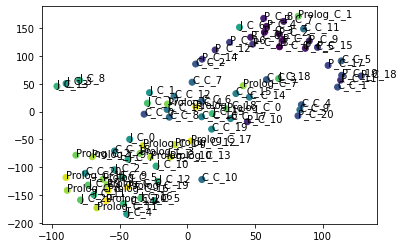

In [111]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [112]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [113]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

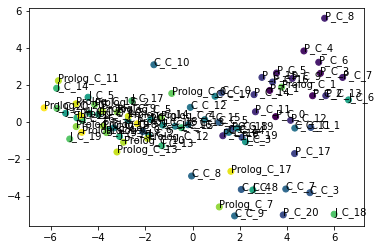

In [114]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

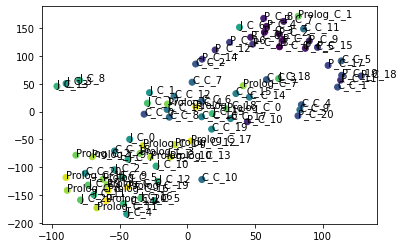

In [115]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 8 group target

In [116]:
similar_doc = model.docvecs.most_similar('8')
print(similar_doc[0])

('6', 0.9443482756614685)


In [117]:
similar_doc

[('6', 0.9443482756614685),
 ('7', 0.9396905899047852),
 ('12', 0.8967268466949463),
 ('11', 0.8886361122131348),
 ('13', 0.8784839510917664),
 ('2', 0.8356577157974243),
 ('4', 0.8306382894515991),
 ('14', 0.8185654878616333),
 ('1', 0.8001532554626465),
 ('10', 0.798202395439148)]

In [118]:
model['8']

array([-0.6291265 ,  4.987064  ,  3.757728  , -2.3944538 ,  2.2043815 ,
       -4.1372404 , -2.6818779 ,  0.6083033 , -0.74558514,  0.13379462,
        1.8611393 ,  1.5698357 ,  5.465229  , -2.6241405 , -5.3735833 ,
       -1.9806644 , -1.5733867 , -1.540632  , -0.73451334, -0.4193969 ,
        0.84446263, -0.53813833, -1.2521069 , -1.1089286 , -0.01780851,
       -1.598738  ,  0.12504347, -0.63977504,  1.7904565 , -4.3703074 ],
      dtype=float32)

In [119]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

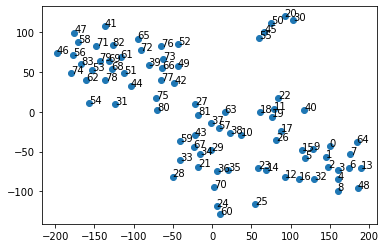

In [120]:
display_closestwords_tsnescatterplot(model, '8')

In [121]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [122]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   184.383301 -135.143890
1   206.255447 -152.501236
2   231.726883 -152.125214
3   249.180237 -168.421219
4   271.692139 -177.104553
..         ...         ...
79 -166.924423  139.080994
80   30.201536  -91.089851
81   46.888592   43.897076
82 -281.037842  210.623245
83 -196.660309  162.887833

[84 rows x 2 columns]


In [123]:
df.to_csv('doc2vec8.csv')

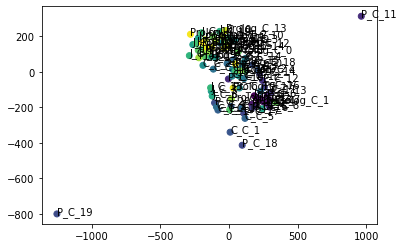

In [124]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [125]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [126]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

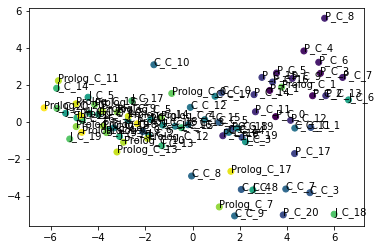

In [127]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

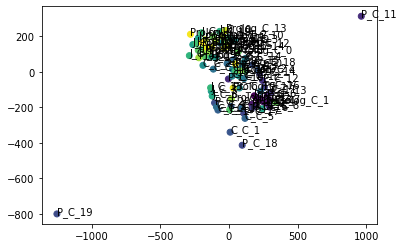

In [128]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 9 group target

In [129]:
similar_doc = model.docvecs.most_similar('9')
print(similar_doc[0])

('72', 0.8218609690666199)


In [130]:
similar_doc

[('72', 0.8218609690666199),
 ('66', 0.8023294806480408),
 ('75', 0.7968801856040955),
 ('8', 0.7782489657402039),
 ('7', 0.769923210144043),
 ('74', 0.7661422491073608),
 ('70', 0.7509759664535522),
 ('15', 0.7469900250434875),
 ('71', 0.741203784942627),
 ('1', 0.7401995062828064)]

In [131]:
model['9']

array([ 0.4288192 ,  4.0212693 ,  1.7450274 , -0.7398044 ,  2.362523  ,
       -3.7019508 , -2.2263253 ,  1.7976619 , -2.8305159 , -1.0115176 ,
        2.275454  ,  1.4144821 ,  4.0530653 , -2.2796464 , -4.662001  ,
       -0.44053835, -1.8993758 , -2.5517373 ,  0.2241895 , -2.8221772 ,
        0.5741439 , -0.16601153, -1.6229686 , -0.17338216, -0.54319125,
       -0.43120146, -0.1767064 ,  0.8871455 ,  1.7729757 , -1.1028544 ],
      dtype=float32)

In [132]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

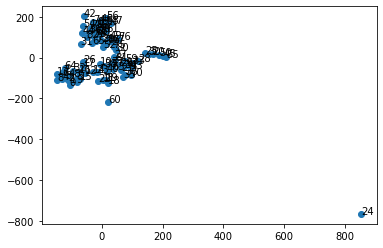

In [133]:
display_closestwords_tsnescatterplot(model, '9')

In [134]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [135]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   279.694672  -82.345169
1   179.677200 -111.110199
2   189.114349  -93.609062
3   210.542282  -96.499161
4   213.018112 -116.859680
..         ...         ...
79 -101.383026  227.498306
80    2.304507   58.973698
81  -39.161808  -76.544830
82 -177.055954  185.764404
83 -129.034729  262.580566

[84 rows x 2 columns]


In [136]:
df.to_csv('doc2vec9.csv')

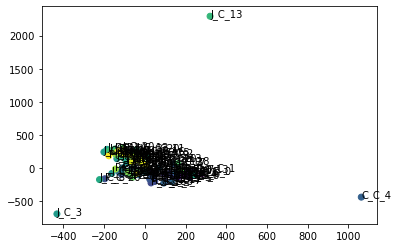

In [137]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [138]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [139]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

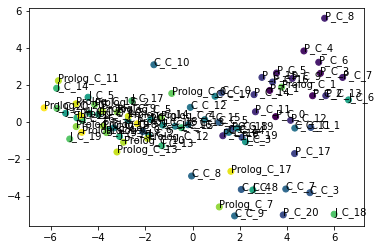

In [140]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

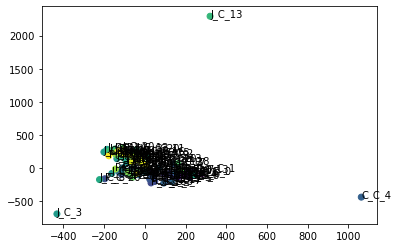

In [141]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 10 group target

In [142]:
similar_doc = model.docvecs.most_similar('10')
print(similar_doc[0])

('11', 0.9380308985710144)


In [143]:
similar_doc

[('11', 0.9380308985710144),
 ('5', 0.936155378818512),
 ('3', 0.8972153067588806),
 ('2', 0.894281268119812),
 ('7', 0.8832074403762817),
 ('4', 0.8676400780677795),
 ('6', 0.8670467734336853),
 ('0', 0.8635191321372986),
 ('14', 0.8498438596725464),
 ('12', 0.8127318024635315)]

In [144]:
model['10']

array([-0.32156917,  1.9489032 ,  1.3638136 , -0.42620474,  0.24794333,
       -2.0037332 ,  0.31024012,  1.0103401 , -3.0881166 , -2.2683985 ,
        1.1976238 ,  2.1460273 ,  3.703976  , -2.8600175 , -3.3438911 ,
       -1.1791703 , -2.6568232 , -2.2465322 ,  1.9662216 , -0.66424936,
        1.7544323 ,  1.6167972 , -0.17557411, -0.8212899 , -2.7327101 ,
        1.3006963 ,  1.3383484 ,  1.048506  , -0.32082632,  0.13403645],
      dtype=float32)

In [145]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

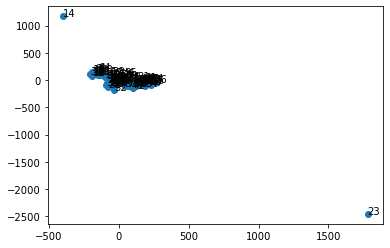

In [146]:
display_closestwords_tsnescatterplot(model, '10')

In [147]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [148]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x           y
0  -18.786392 -210.124405
1  -17.178581 -198.488342
2  -17.195839 -188.234207
3  -10.194366 -180.815140
4  -18.182499 -174.103455
..        ...         ...
79  46.372429  130.441483
80  63.316395    9.378835
81  -2.188285   35.956982
82  27.203419  141.877243
83  59.297668  157.289444

[84 rows x 2 columns]


In [149]:
df.to_csv('doc2vec10.csv')

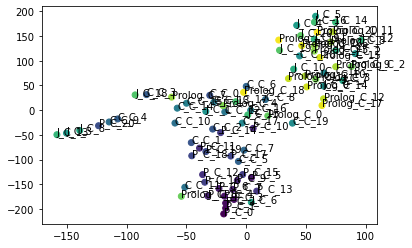

In [150]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [151]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [152]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

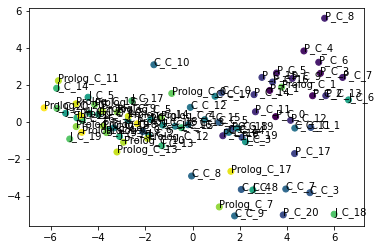

In [153]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

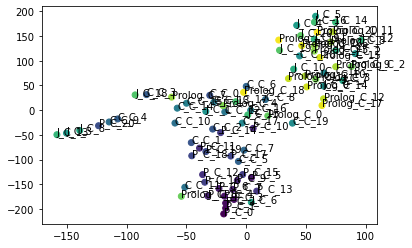

In [154]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 11 group target

In [155]:
similar_doc = model.docvecs.most_similar('11')
print(similar_doc[0])

('10', 0.9380308389663696)


In [156]:
similar_doc

[('10', 0.9380308389663696),
 ('7', 0.9179202318191528),
 ('2', 0.8996524214744568),
 ('6', 0.8980103135108948),
 ('3', 0.8944577574729919),
 ('12', 0.8930879235267639),
 ('4', 0.8918036222457886),
 ('8', 0.8886362314224243),
 ('5', 0.8681982159614563),
 ('14', 0.8438382744789124)]

In [157]:
model['11']

array([ 0.89370704,  3.8804882 , -0.26936895,  1.3474413 ,  1.4443203 ,
       -3.1927354 , -3.2167175 ,  0.40360183, -1.791924  ,  0.46824327,
        0.16739902,  2.0839043 ,  4.1077623 , -2.5286279 , -1.4746825 ,
       -1.8411492 , -2.1873245 , -0.41948977, -0.43198472, -1.0736674 ,
        1.5715812 , -0.31267783, -2.604821  , -0.595144  , -1.3421361 ,
       -0.609538  ,  1.1409519 ,  1.3011563 ,  2.7144735 , -2.7410393 ],
      dtype=float32)

In [158]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

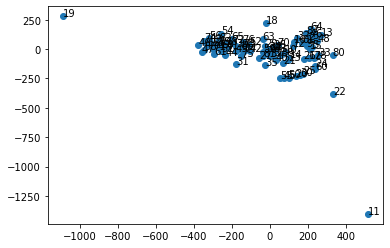

In [159]:
display_closestwords_tsnescatterplot(model, '11')

In [160]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [161]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x           y
0   -2.101092  240.623199
1  -13.454043  226.561935
2  -27.614573  218.369339
3  -41.009903  224.601212
4  -47.459240  240.059952
..        ...         ...
79  84.581055 -155.231400
80 -39.551937  -91.248596
81 -18.842485  -35.317696
82  99.682198 -132.844650
83  91.264885 -195.133667

[84 rows x 2 columns]


In [162]:
df.to_csv('doc2vec11.csv')

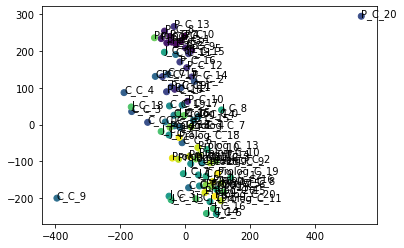

In [163]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [164]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [165]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

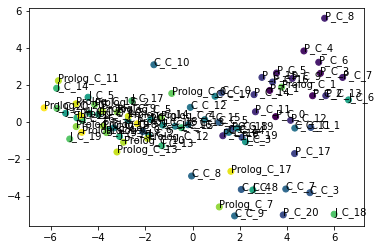

In [166]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

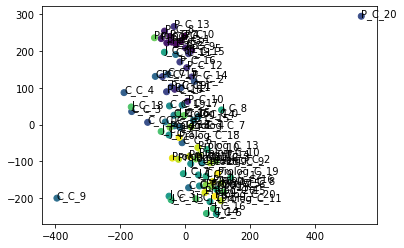

In [167]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 12 group target

In [168]:
similar_doc = model.docvecs.most_similar('12')
print(similar_doc[0])

('13', 0.9240483641624451)


In [169]:
similar_doc

[('13', 0.9240483641624451),
 ('6', 0.9051862359046936),
 ('8', 0.8967268466949463),
 ('11', 0.8930878639221191),
 ('2', 0.8640356063842773),
 ('7', 0.848732054233551),
 ('14', 0.8362194299697876),
 ('4', 0.8277996778488159),
 ('17', 0.8148314356803894),
 ('10', 0.8127316236495972)]

In [170]:
model['12']

array([ 0.08830147,  2.2721968 ,  1.8599958 ,  1.3114877 ,  3.0389645 ,
       -2.7463555 ,  0.46582323,  0.25870806, -3.9431016 , -1.4551816 ,
        2.137212  ,  1.3979188 ,  4.6997275 , -1.7634332 , -3.1089916 ,
       -1.5987371 , -0.9660055 , -1.7698045 ,  0.8350393 , -2.3963377 ,
        3.4567204 ,  0.6739373 , -1.9704913 ,  0.6192372 , -2.4234083 ,
       -0.79911005, -0.5996085 ,  1.9530469 ,  2.1696837 , -3.684678  ],
      dtype=float32)

In [171]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

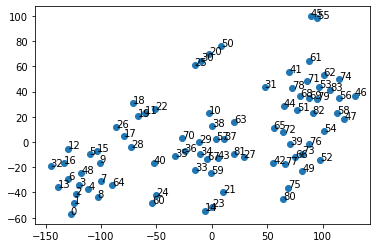

In [172]:
display_closestwords_tsnescatterplot(model, '12')

In [173]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [174]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0    33.823437  -99.579254
1    46.986790 -108.907921
2    60.826359 -113.552437
3    65.009659 -126.048553
4    79.115448 -131.588791
..         ...         ...
79    0.718916  163.891861
80 -120.812477   41.662270
81  -11.132356   -4.312540
82  -41.632458  186.985092
83   35.690601  167.150330

[84 rows x 2 columns]


In [175]:
df.to_csv('doc2vec12.csv')

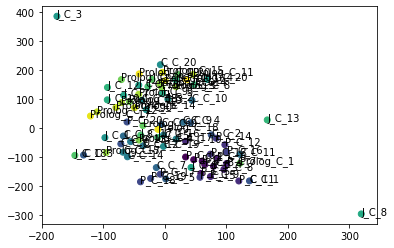

In [176]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [177]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [178]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

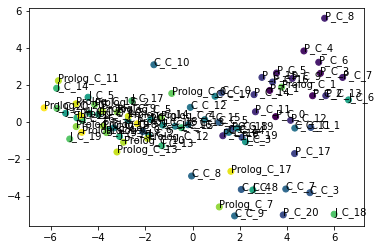

In [179]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

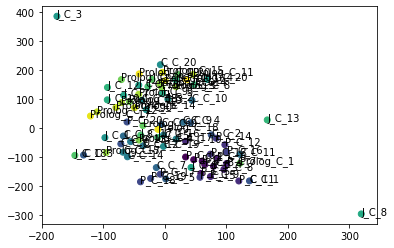

In [180]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 13 group target

In [181]:
similar_doc = model.docvecs.most_similar('13')
print(similar_doc[0])

('14', 0.9249505400657654)


In [182]:
similar_doc

[('14', 0.9249505400657654),
 ('12', 0.9240483641624451),
 ('16', 0.8988596200942993),
 ('6', 0.8932896852493286),
 ('8', 0.8784838914871216),
 ('17', 0.8548570275306702),
 ('7', 0.8441562652587891),
 ('18', 0.8414381742477417),
 ('11', 0.8358951210975647),
 ('4', 0.8243907690048218)]

In [183]:
model['13']

array([-1.4005923 ,  5.2812085 ,  3.358056  , -0.4746018 ,  2.9711392 ,
       -3.6568437 , -4.244831  , -0.45718426, -2.7472777 , -0.11428659,
       -0.4621959 ,  1.8550998 ,  4.66483   , -2.1197004 , -0.92378485,
       -1.2532667 , -3.9633656 , -2.68313   ,  3.4764218 , -0.28968558,
        3.3829343 , -0.331817  , -2.048133  , -1.4371547 ,  1.5399463 ,
       -0.11391772,  1.2248701 ,  2.7333145 ,  1.5360792 , -3.1076286 ],
      dtype=float32)

In [184]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

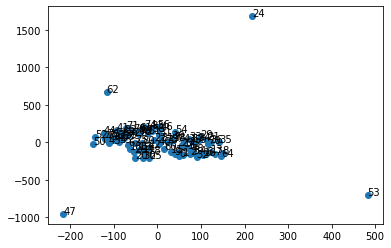

In [185]:
display_closestwords_tsnescatterplot(model, '13')

In [186]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [187]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0    72.657410  104.599243
1    70.793556  115.534698
2    78.691833  123.721558
3    76.047028  134.070831
4    74.182213  144.989990
..         ...         ...
79 -129.071335  -46.379959
80  -35.195965   -5.585979
81    3.774539  -36.947048
82 -103.976433  -17.289881
83 -146.739120  -40.901264

[84 rows x 2 columns]


In [188]:
df.to_csv('doc2vec13.csv')

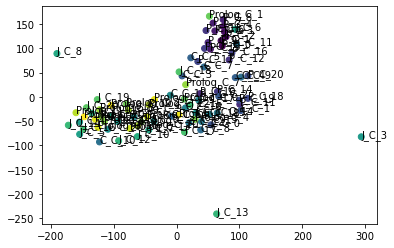

In [189]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [190]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [191]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

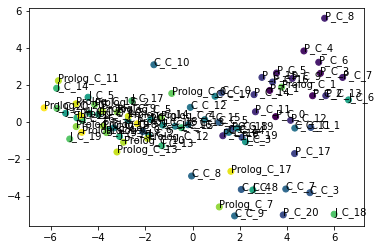

In [192]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

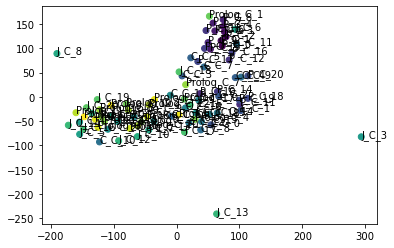

In [193]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 14 group target

In [194]:
similar_doc = model.docvecs.most_similar('14')
print(similar_doc[0])

('13', 0.9249505996704102)


In [195]:
similar_doc

[('13', 0.9249505996704102),
 ('7', 0.8654261231422424),
 ('16', 0.8572548627853394),
 ('15', 0.8540276885032654),
 ('18', 0.853076159954071),
 ('10', 0.8498437404632568),
 ('6', 0.8456670045852661),
 ('11', 0.8438382148742676),
 ('12', 0.8362194299697876),
 ('8', 0.8185655474662781)]

In [196]:
model['14']

array([ 1.2822809 ,  4.1370063 ,  2.2816422 ,  0.87369794,  3.7533605 ,
       -1.4845629 , -0.02588096,  0.25796345, -4.920801  ,  0.15592788,
        1.2671822 ,  0.40187082,  2.0464125 , -2.1837456 , -3.3036005 ,
       -2.0687065 , -1.2834114 ,  0.5448828 ,  0.9301662 , -1.4503655 ,
        1.7566136 , -0.24437474, -2.0122342 ,  1.0415729 ,  0.7638491 ,
       -0.8978941 , -0.54441035,  1.8853772 ,  3.1233373 , -2.4362428 ],
      dtype=float32)

In [197]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

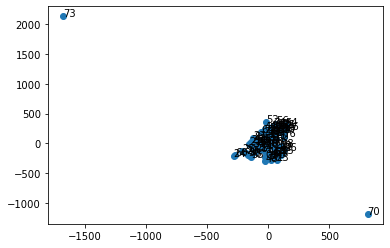

In [198]:
display_closestwords_tsnescatterplot(model, '14')

In [199]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [200]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   306.544312   15.285373
1   -78.362556 -170.682770
2   -80.004463 -191.156021
3   -98.036926 -190.266998
4  -108.617523 -206.761749
..         ...         ...
79  146.401169   -0.420286
80 -205.012512   11.739963
81   15.327233  103.761902
82  163.950790   40.457554
83  185.401260  -32.278137

[84 rows x 2 columns]


In [201]:
df.to_csv('doc2vec14.csv')

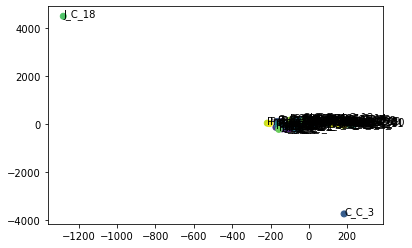

In [202]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [203]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [204]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

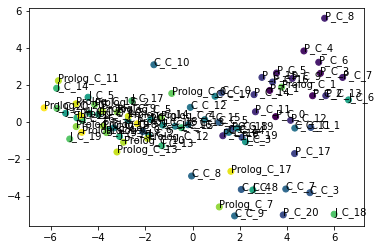

In [205]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

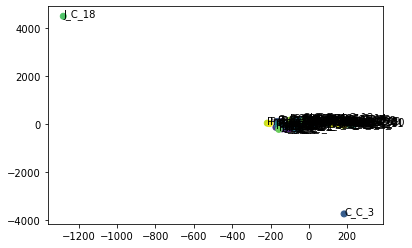

In [206]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 15 group target

In [207]:
similar_doc = model.docvecs.most_similar('15')
print(similar_doc[0])

('16', 0.9157134890556335)


In [208]:
similar_doc

[('16', 0.9157134890556335),
 ('20', 0.863517165184021),
 ('14', 0.8540276885032654),
 ('18', 0.8521299958229065),
 ('19', 0.8363044261932373),
 ('17', 0.8330094218254089),
 ('13', 0.8211504220962524),
 ('7', 0.7998669743537903),
 ('5', 0.766956090927124),
 ('6', 0.762732744216919)]

In [209]:
model['15']

array([-0.6866687 ,  4.54338   ,  1.3096378 , -0.8390151 ,  2.9073238 ,
       -3.2548199 ,  0.35560304,  0.94582886, -2.830581  , -1.6099799 ,
        1.0820436 ,  2.5448878 ,  3.263138  , -2.1382375 , -4.5787563 ,
       -0.9626124 , -0.8992845 , -1.2969619 ,  0.37700072, -1.334814  ,
        1.3431894 , -0.09081677, -1.9880158 , -0.18811288,  0.98578054,
       -0.56418407, -1.1919265 , -1.0167304 ,  0.90148735, -1.5920444 ],
      dtype=float32)

In [210]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

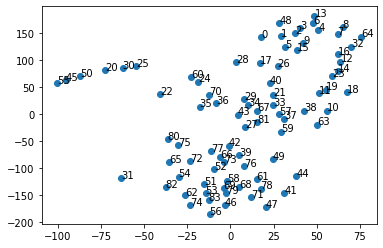

In [211]:
display_closestwords_tsnescatterplot(model, '15')

In [212]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [213]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   210.847916   51.246948
1   210.088043   71.411736
2   220.929565   87.139969
3   238.513214   90.980934
4   249.288971   75.353584
..         ...         ...
79  -68.235458 -172.255859
80 -148.078033    1.716460
81  -31.076406   -2.539742
82  -13.267920 -184.048447
83 -104.165146 -194.499695

[84 rows x 2 columns]


In [214]:
df.to_csv('doc2vec15.csv')

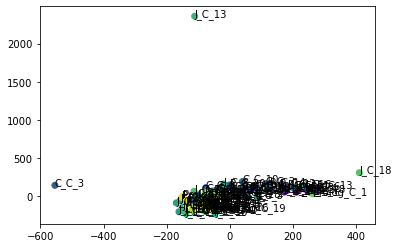

In [215]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [216]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [217]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

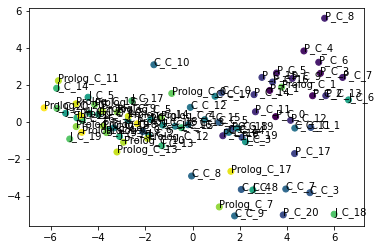

In [218]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

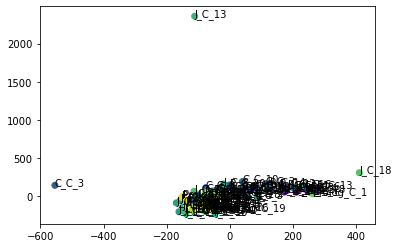

In [219]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 16 group target

In [220]:
similar_doc = model.docvecs.most_similar('16')
print(similar_doc[0])

('17', 0.9466222524642944)


In [221]:
similar_doc

[('17', 0.9466222524642944),
 ('15', 0.9157134890556335),
 ('19', 0.914337694644928),
 ('18', 0.9117248058319092),
 ('13', 0.8988596200942993),
 ('20', 0.8934614658355713),
 ('14', 0.8572549223899841),
 ('6', 0.8418614268302917),
 ('12', 0.8102573156356812),
 ('11', 0.7867622971534729)]

In [222]:
model['16']

array([-0.612987  ,  2.9759474 ,  2.1794136 , -0.68258196,  3.511778  ,
       -3.403323  , -1.7447062 , -0.36899778, -2.8669577 , -0.3525067 ,
        1.2754726 ,  0.13774462,  3.6613073 , -2.3940442 , -2.1900797 ,
       -0.71131074, -0.77492714, -0.90287614,  0.08223654, -0.55107075,
        2.8933342 , -1.1070706 , -2.1074142 , -0.57008916, -0.77090204,
       -1.1971492 , -1.5235416 , -1.0554292 ,  2.2308772 , -4.196736  ],
      dtype=float32)

In [223]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

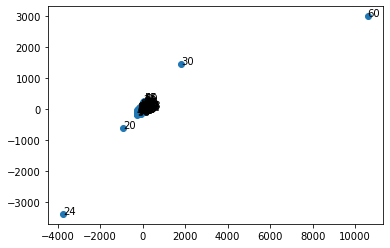

In [224]:
display_closestwords_tsnescatterplot(model, '16')

In [225]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [226]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x          y
0   -63.116222 -72.927124
1   -70.075195 -79.631271
2   -79.142212 -80.969833
3   -84.745247 -87.660423
4   -92.648071 -91.545624
..         ...        ...
79   99.234138  46.238968
80   22.746450  94.358177
81   12.371734  18.300209
82   83.229393  58.721127
83  112.653152  64.735382

[84 rows x 2 columns]


In [227]:
df.to_csv('doc2vec16.csv')

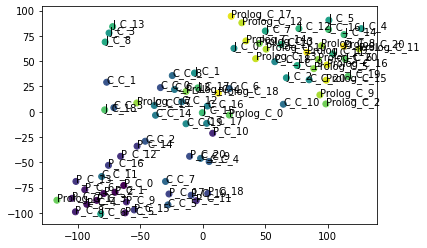

In [228]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [229]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [230]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

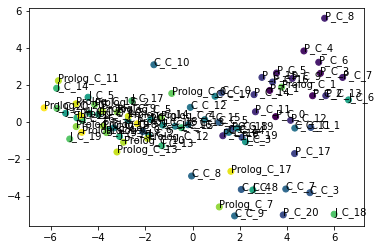

In [231]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

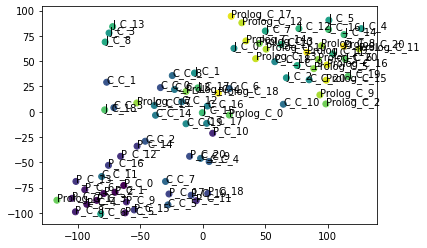

In [232]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 17 group target

In [233]:
similar_doc = model.docvecs.most_similar('17')
print(similar_doc[0])

('16', 0.9466222524642944)


In [234]:
similar_doc

[('16', 0.9466222524642944),
 ('18', 0.9289749264717102),
 ('19', 0.9111639857292175),
 ('20', 0.9084572792053223),
 ('13', 0.8548570871353149),
 ('15', 0.8330094218254089),
 ('12', 0.8148314952850342),
 ('6', 0.811052680015564),
 ('11', 0.8037517070770264),
 ('8', 0.7673476934432983)]

In [235]:
model['17']

array([-1.4214461 ,  3.8761733 ,  0.7100268 , -0.25488773,  3.171675  ,
       -3.3180625 , -1.0216622 ,  2.083597  , -5.80993   ,  0.7407429 ,
        1.0248572 ,  1.0714834 ,  3.9571838 , -1.3457693 , -1.1269504 ,
       -3.0267403 , -3.1122615 , -0.81484634,  0.51072454, -2.35018   ,
        0.7572018 ,  0.571148  , -1.8168211 , -2.7626686 ,  0.00539308,
       -0.81776196, -1.324871  , -0.7794146 ,  0.14989889, -2.7852924 ],
      dtype=float32)

In [236]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

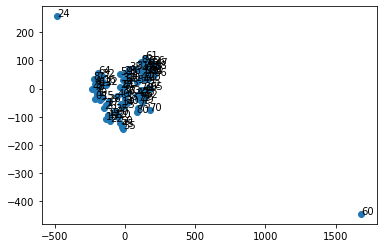

In [237]:
display_closestwords_tsnescatterplot(model, '17')

In [238]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [239]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0    14.099309  208.632324
1    -0.582333  198.071259
2   -17.304575  197.276001
3   -27.612511  208.655426
4   -41.677311  215.819565
..         ...         ...
79   65.289421 -168.701965
80  100.832626  -13.231242
81    7.247322  -16.614662
82  100.767036 -167.568253
83   69.648087 -197.432571

[84 rows x 2 columns]


In [240]:
df.to_csv('doc2vec17.csv')

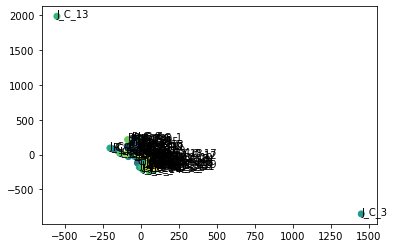

In [241]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [242]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [243]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

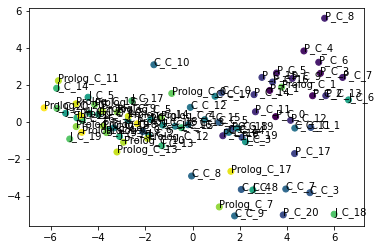

In [244]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

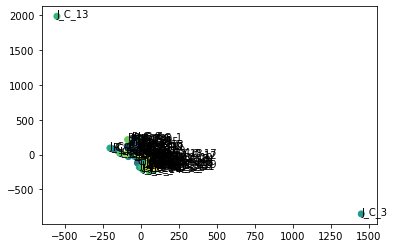

In [245]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 18 group target

In [246]:
similar_doc = model.docvecs.most_similar('18')
print(similar_doc[0])

('19', 0.9356939792633057)


In [247]:
similar_doc

[('19', 0.9356939792633057),
 ('17', 0.9289748668670654),
 ('16', 0.9117247462272644),
 ('20', 0.8985258936882019),
 ('14', 0.8530760407447815),
 ('15', 0.8521298170089722),
 ('13', 0.8414382934570312),
 ('6', 0.791817843914032),
 ('11', 0.7840070128440857),
 ('22', 0.7545093297958374)]

In [248]:
model['18']

array([-1.3175942 ,  6.233078  , -1.6584958 , -0.06740624,  1.3163244 ,
       -3.01649   , -3.7891736 ,  0.07984465, -3.242342  , -0.3741574 ,
        0.00996187,  1.0277252 ,  2.8165746 , -0.6960327 , -1.0145249 ,
       -3.0735104 , -0.9654918 ,  0.5363746 , -0.0063425 , -3.7179759 ,
        3.470269  , -0.43457627, -0.91133565,  1.8085339 ,  1.1997706 ,
        0.80967355, -2.4504368 , -0.89898247,  2.5555816 , -1.0830514 ],
      dtype=float32)

In [249]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

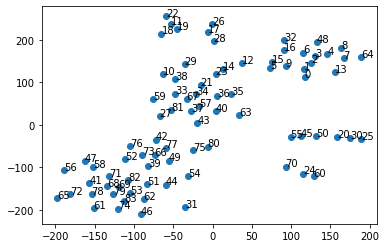

In [250]:
display_closestwords_tsnescatterplot(model, '18')

In [251]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [252]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

            x           y
0  -85.966637  188.293259
1  -69.567299  197.910355
2  -64.966331  213.200333
3  -67.588768  229.424347
4  -49.964165  235.390091
..        ...         ...
79 -19.639605 -183.830261
80 -50.999554  -34.999500
81  87.022537  -11.611320
82   5.209217 -249.949829
83 -29.719795 -208.655167

[84 rows x 2 columns]


In [253]:
df.to_csv('doc2vec18.csv')

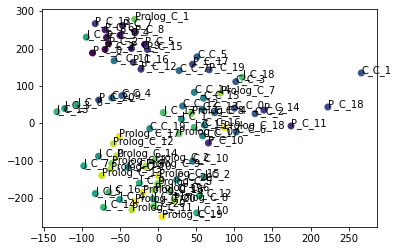

In [254]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [255]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [256]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

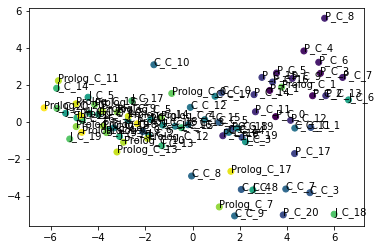

In [257]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

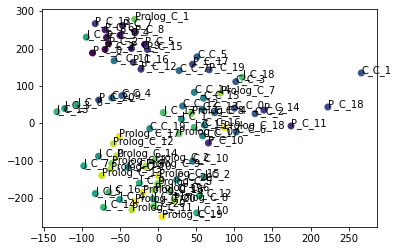

In [258]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 19 group target

In [259]:
similar_doc = model.docvecs.most_similar('19')
print(similar_doc[0])

('20', 0.9466023445129395)


In [260]:
similar_doc

[('20', 0.9466023445129395),
 ('18', 0.9356940984725952),
 ('16', 0.914337694644928),
 ('17', 0.9111639857292175),
 ('15', 0.8363044261932373),
 ('13', 0.79238361120224),
 ('6', 0.7616357803344727),
 ('14', 0.7592267990112305),
 ('21', 0.7561736106872559),
 ('22', 0.7383846640586853)]

In [261]:
model['19']

array([ 2.4222386 ,  3.1736033 , -0.8946651 ,  0.27593914,  2.7167296 ,
       -1.8370255 , -2.1658206 ,  0.860238  , -4.096505  ,  2.448616  ,
       -0.39815515,  2.629299  ,  4.032511  , -1.1819743 , -1.2841803 ,
       -2.4280167 , -2.0000854 , -1.4902049 , -0.5321432 , -1.1184326 ,
        0.97086716,  0.25386512, -1.8473632 , -0.16051465, -0.44121963,
        0.34343466, -0.9031253 , -0.926949  ,  2.5501306 , -1.8962353 ],
      dtype=float32)

In [262]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

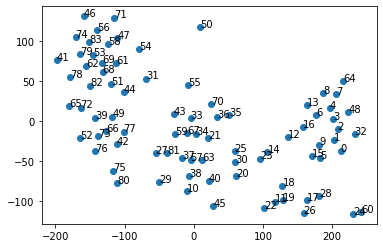

In [263]:
display_closestwords_tsnescatterplot(model, '19')

In [264]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [265]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   -91.819824  -95.027107
1   -94.110573  -82.372887
2  -102.519440  -74.625137
3  -112.691177  -71.680298
4  -121.396637  -63.645439
..         ...         ...
79   35.550850  127.515160
80  129.047256   40.860142
81   49.173683   13.298527
82   75.576225  138.763229
83   32.502880  156.072311

[84 rows x 2 columns]


In [266]:
df.to_csv('doc2vec19.csv')

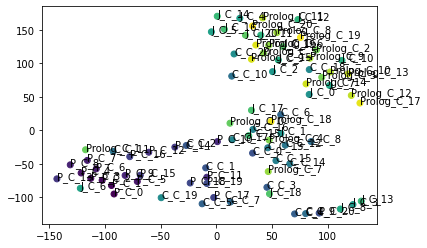

In [267]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [268]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [269]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

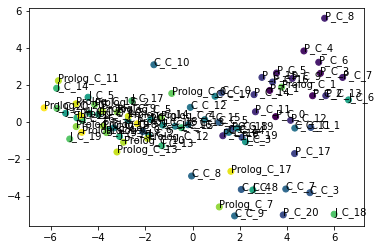

In [270]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

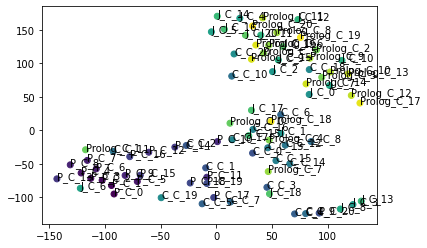

In [271]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

# Python Clustering 20 group target

In [272]:
similar_doc = model.docvecs.most_similar('20')
print(similar_doc[0])

('19', 0.9466023445129395)


In [273]:
similar_doc

[('19', 0.9466023445129395),
 ('17', 0.9084572792053223),
 ('18', 0.8985258936882019),
 ('16', 0.8934614658355713),
 ('15', 0.8635170459747314),
 ('13', 0.769258439540863),
 ('72', 0.7237545251846313),
 ('14', 0.7205668091773987),
 ('71', 0.6984574794769287),
 ('22', 0.6957916021347046)]

In [274]:
model['20']

array([ 0.9152067 ,  0.9124947 ,  0.7304418 ,  0.5032598 ,  1.9955218 ,
       -3.2329495 ,  0.30907676, -1.0608428 , -6.437267  , -0.89803404,
        0.2549642 ,  2.8833203 ,  3.4429948 , -0.66368246, -2.818725  ,
       -2.5407002 , -4.9033437 , -3.182224  ,  1.9984779 , -4.2164807 ,
        4.6392636 ,  0.46260917, -1.0517488 , -1.5274702 ,  0.27221945,
       -0.37092113, -0.02570733,  1.2299513 , -0.5406469 ,  0.56531763],
      dtype=float32)

In [275]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,30), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.docvecs.most_similar(word,topn=85)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
#     plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

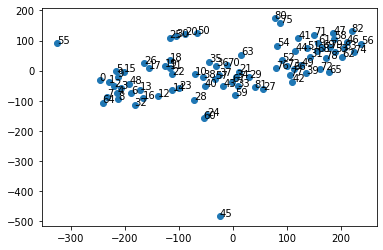

In [276]:
display_closestwords_tsnescatterplot(model, '20')

In [277]:
doc_tags = list(model.docvecs.doctags.keys())
print(doc_tags)
X = model[doc_tags]
print(X)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83']
[[ 0.37621436  3.5731325   2.2868276  ... -1.474645    1.3862326
  -1.3618836 ]
 [ 0.96674615  4.281096    2.5892656  ... -0.58754283  1.7802478
  -1.4149375 ]
 [ 0.9933168   4.466707    3.7006168  ... -0.05410406  1.1218829
  -2.109108  ]
 ...
 [-0.1109741   2.188282   -0.1438482  ...  1.60903     0.9558601
  -1.8965014 ]
 [-0.6882964   1.5193563  -1.4545314  ... -0.15177913 -0.86843383
  -1.1531279 ]
 [ 0.01453243  0.0061024  -0.01344032 ... -0.01378757 -0.01197432
  -0.01426278]]


In [278]:
tsne = TSNE(n_components=2, perplexity=5)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])
print(df)

             x           y
0   179.238922  -58.642063
1   177.971207  -77.751640
2   189.889923  -90.528191
3   190.644272 -107.451111
4   174.915817 -114.752357
..         ...         ...
79  -56.788090  159.681564
80  -68.800194 -156.525894
81  -54.321999  -58.931644
82  -65.159264  246.618042
83  -69.253242  197.016586

[84 rows x 2 columns]


In [279]:
df.to_csv('doc2vec20.csv')

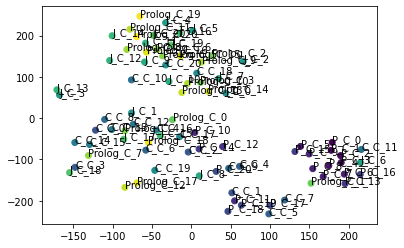

In [280]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()

In [281]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_1 = pd.DataFrame(X_pca, index=doc_tags, columns=['x', 'y'])
print(df_1)

           x         y
0   3.513681  0.267672
1   3.262459  1.685855
2   5.076254  1.398910
3   5.406318  2.612405
4   4.709086  3.822826
..       ...       ...
79 -4.742773  0.322475
80  1.621084 -2.690528
81 -2.335325 -0.119764
82 -4.684227 -0.581258
83 -6.277366  0.744074

[84 rows x 2 columns]


In [282]:
df_1.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83'],
      dtype='object')

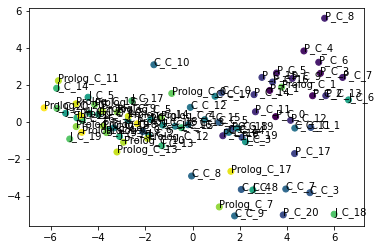

In [283]:
plt.scatter(df_1['x'], df_1['y'], c=range(84))
for i in df_1.index:
    plt.text(df_1['x'][i], df_1['y'][i],Data_root[int(i)])
plt.show()

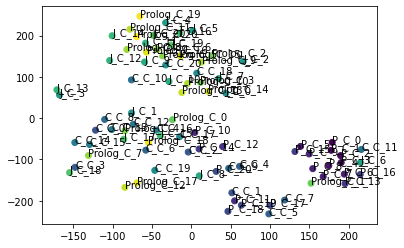

In [284]:
plt.scatter(df['x'], df['y'], c=range(84))
for i in df.index:
    plt.text(df['x'][i], df['y'][i],Data_root[int(i)])
plt.show()